## IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import pandas_profiling as pp
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

c:\Users\rkd3d\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\4057875054.py:20: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
## importing dataset 

In [3]:
#IMPORTING THE DATASET 
dataset=pd.read_csv("liver.csv", encoding_errors= 'replace')
#pp.ProfileReport(dataset)
#report.to_file(output_file='output.html')
print(dataset)
dataset.max()

       Age of the patient Gender of the patient  Total Bilirubin  \
0                    65.0                Female              0.7   
1                    62.0                  Male             10.9   
2                    62.0                  Male              7.3   
3                    58.0                  Male              1.0   
4                    72.0                  Male              3.9   
...                   ...                   ...              ...   
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin  �Alkphos Alkaline Phosphotase  \
0                   0.1                          187.0   
1                   5.5                          699.0   
2        

C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\1138432073.py:6: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.max()


Age of the patient                        90.0
Total Bilirubin                           75.0
Direct Bilirubin                          19.7
�Alkphos Alkaline Phosphotase           2110.0
�Sgpt Alamine Aminotransferase          2000.0
Sgot Aspartate Aminotransferase         4929.0
Total Protiens                             9.6
ALB Albumin                                5.5
A/G Ratio Albumin and Globulin Ratio       2.8
Result                                     2.0
dtype: float64

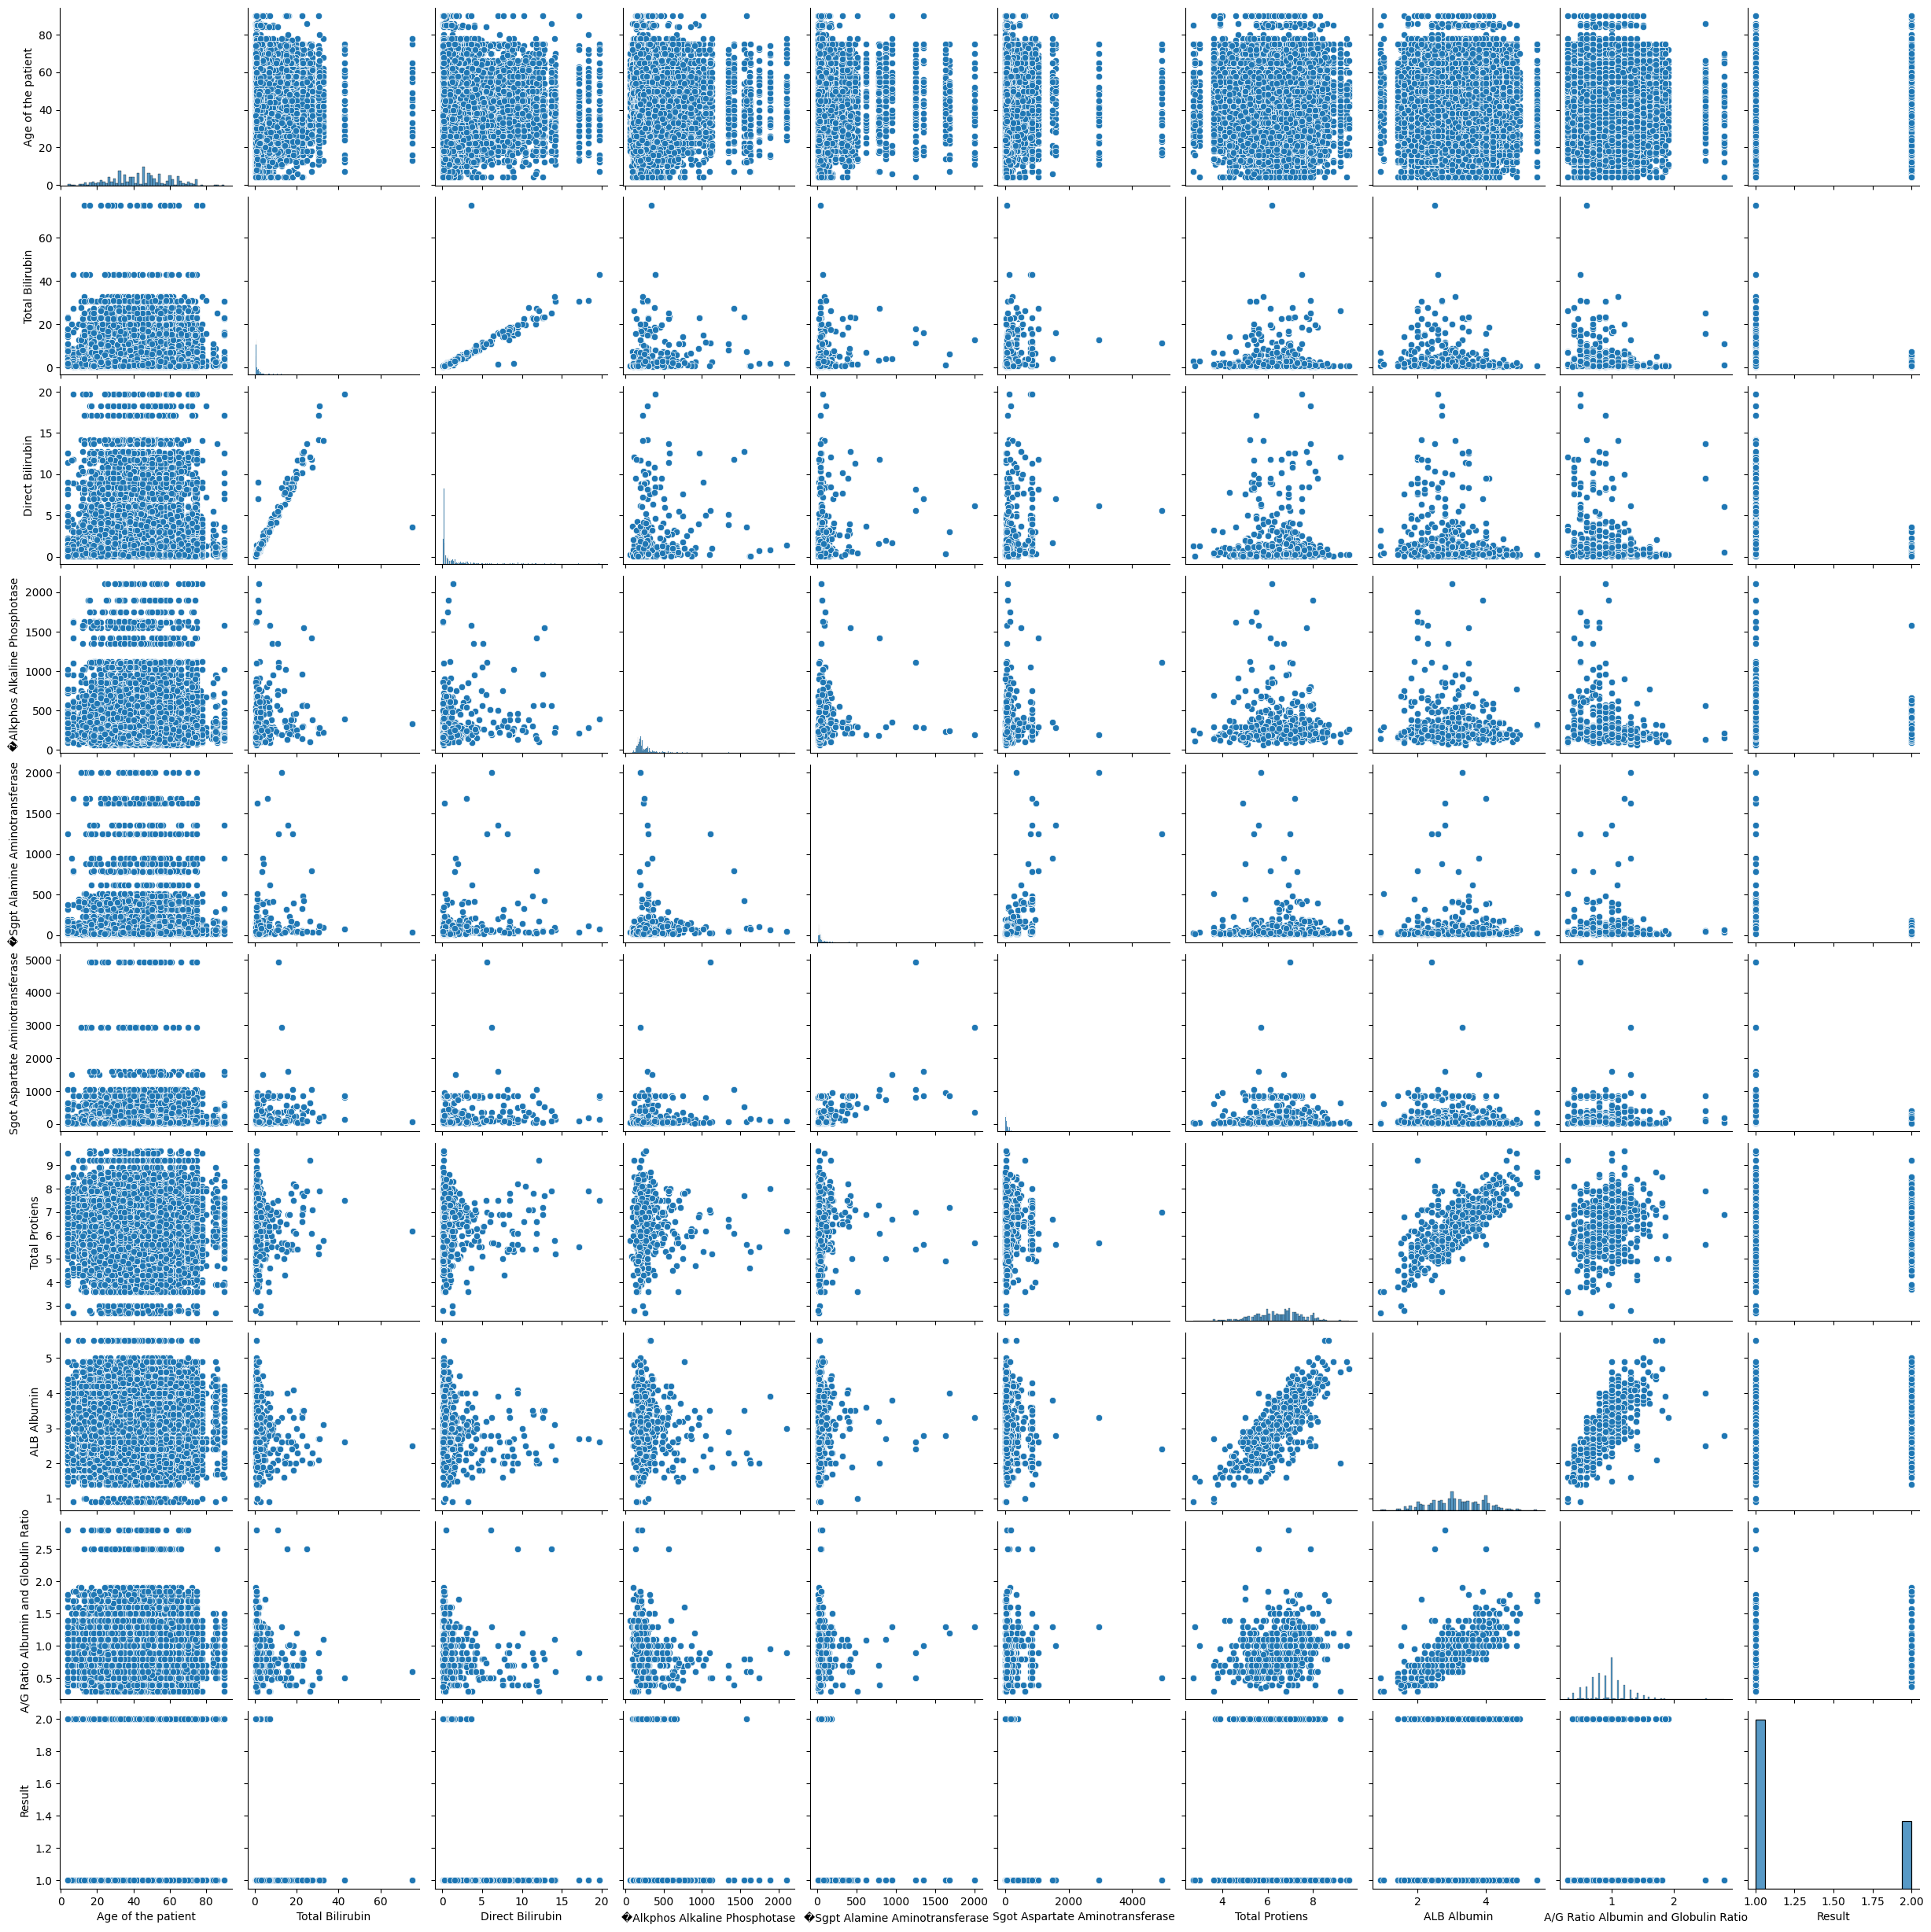

In [4]:
sns.pairplot(dataset)
plt.show()

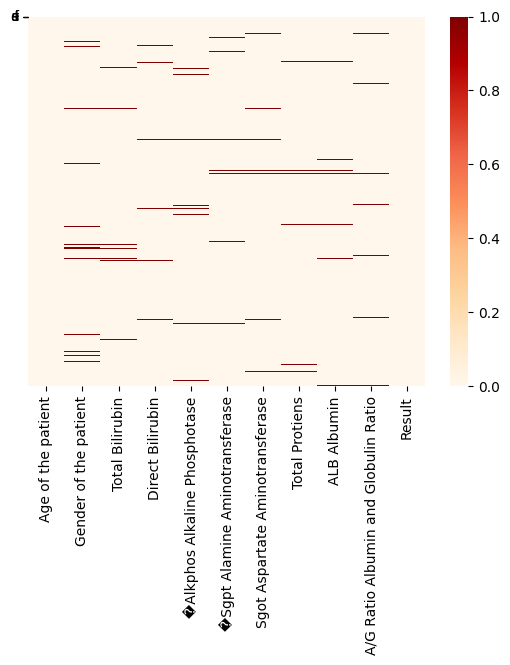

In [5]:
#visualising nan data in dataset
sns.heatmap(dataset.isnull(), yticklabels='false', cbar='false',cmap=plt.cm.OrRd)
plt.show()

C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\4040524986.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(corr_test.corr())
C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\4040524986.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_test.corr(), annot=True, cmap=plt.cm.GnBu)


                                      Age of the patient  Total Bilirubin  \
Age of the patient                              1.000000        -0.001600   
Total Bilirubin                                -0.001600         1.000000   
Direct Bilirubin                               -0.001521         0.886987   
�Alkphos Alkaline Phosphotase                  -0.000761         0.197183   
�Sgpt Alamine Aminotransferase                  0.000659         0.207893   
Sgot Aspartate Aminotransferase                 0.006104         0.240273   
Total Protiens                                 -0.007951         0.001185   
ALB Albumin                                    -0.015164        -0.222522   
A/G Ratio Albumin and Globulin Ratio           -0.018056        -0.197978   
Result                                         -0.004759        -0.225061   

                                      Direct Bilirubin  \
Age of the patient                           -0.001521   
Total Bilirubin                     

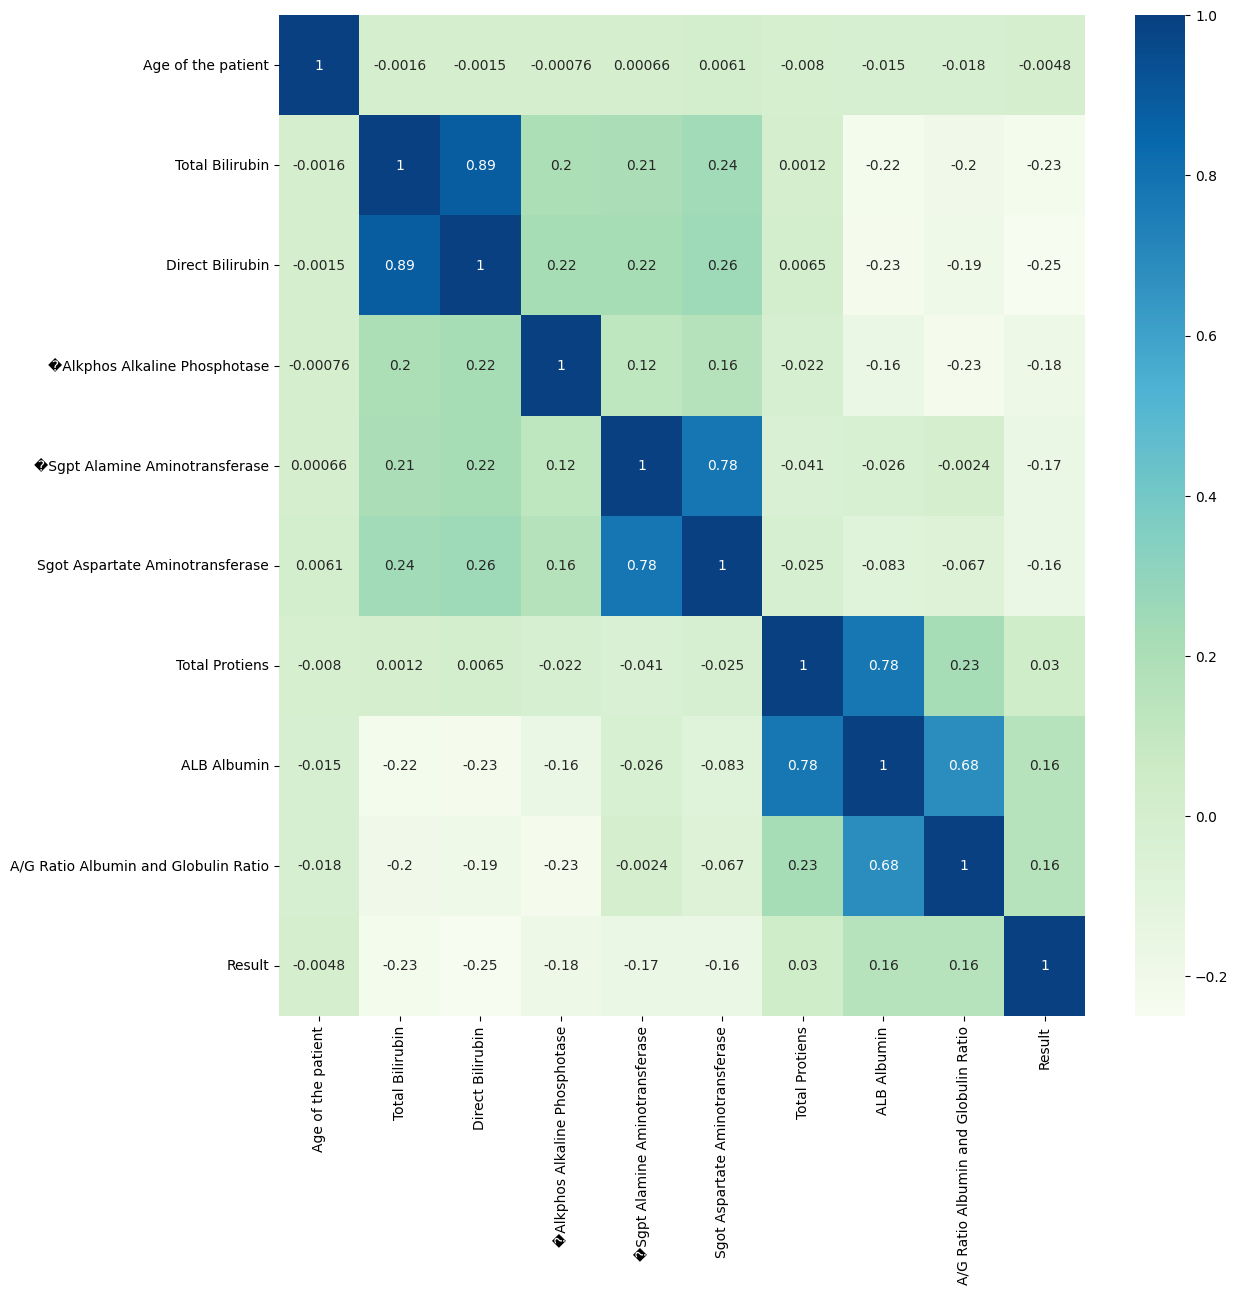

In [6]:
#correlation matrix
corr_test=dataset
print(corr_test.corr())
print(corr_test.head(5))
plt.figure(figsize=(13,13))
sns.heatmap(corr_test.corr(), annot=True, cmap=plt.cm.GnBu)
plt.show()

In [7]:
#dropping unnessary columns
dataset= dataset.drop("Total Bilirubin",axis=1)
#dataset= dataset.drop("Total Protiens",axis=1)
dataset= dataset.drop("ALB Albumin",axis=1)
dataset= dataset.drop("Sgot Aspartate Aminotransferase",axis=1)
print(dataset.head(5))

   Age of the patient Gender of the patient  Direct Bilirubin  \
0                65.0                Female               0.1   
1                62.0                  Male               5.5   
2                62.0                  Male               4.1   
3                58.0                  Male               0.4   
4                72.0                  Male               2.0   

   �Alkphos Alkaline Phosphotase  �Sgpt Alamine Aminotransferase  \
0                          187.0                            16.0   
1                          699.0                            64.0   
2                          490.0                            60.0   
3                          182.0                            14.0   
4                          195.0                            27.0   

   Total Protiens  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8                                  0.90       1  
1             7.5                                  0.74       1  
2 

                                      Age of the patient  Direct Bilirubin  \
Age of the patient                              1.000000         -0.001521   
Direct Bilirubin                               -0.001521          1.000000   
�Alkphos Alkaline Phosphotase                  -0.000761          0.220954   
�Sgpt Alamine Aminotransferase                  0.000659          0.222759   
Total Protiens                                 -0.007951          0.006474   
A/G Ratio Albumin and Globulin Ratio           -0.018056         -0.189414   
Result                                         -0.004759         -0.249538   

                                      �Alkphos Alkaline Phosphotase  \
Age of the patient                                        -0.000761   
Direct Bilirubin                                           0.220954   
�Alkphos Alkaline Phosphotase                              1.000000   
�Sgpt Alamine Aminotransferase                             0.124099   
Total Protiens      

C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\4242992922.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(corr_test.corr())
C:\Users\rkd3d\AppData\Local\Temp\ipykernel_22968\4242992922.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_test.corr(), annot=True, cmap=plt.cm.GnBu)
c:\Users\rkd3d\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.draw()
C:\Users\rkd3d\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) mis

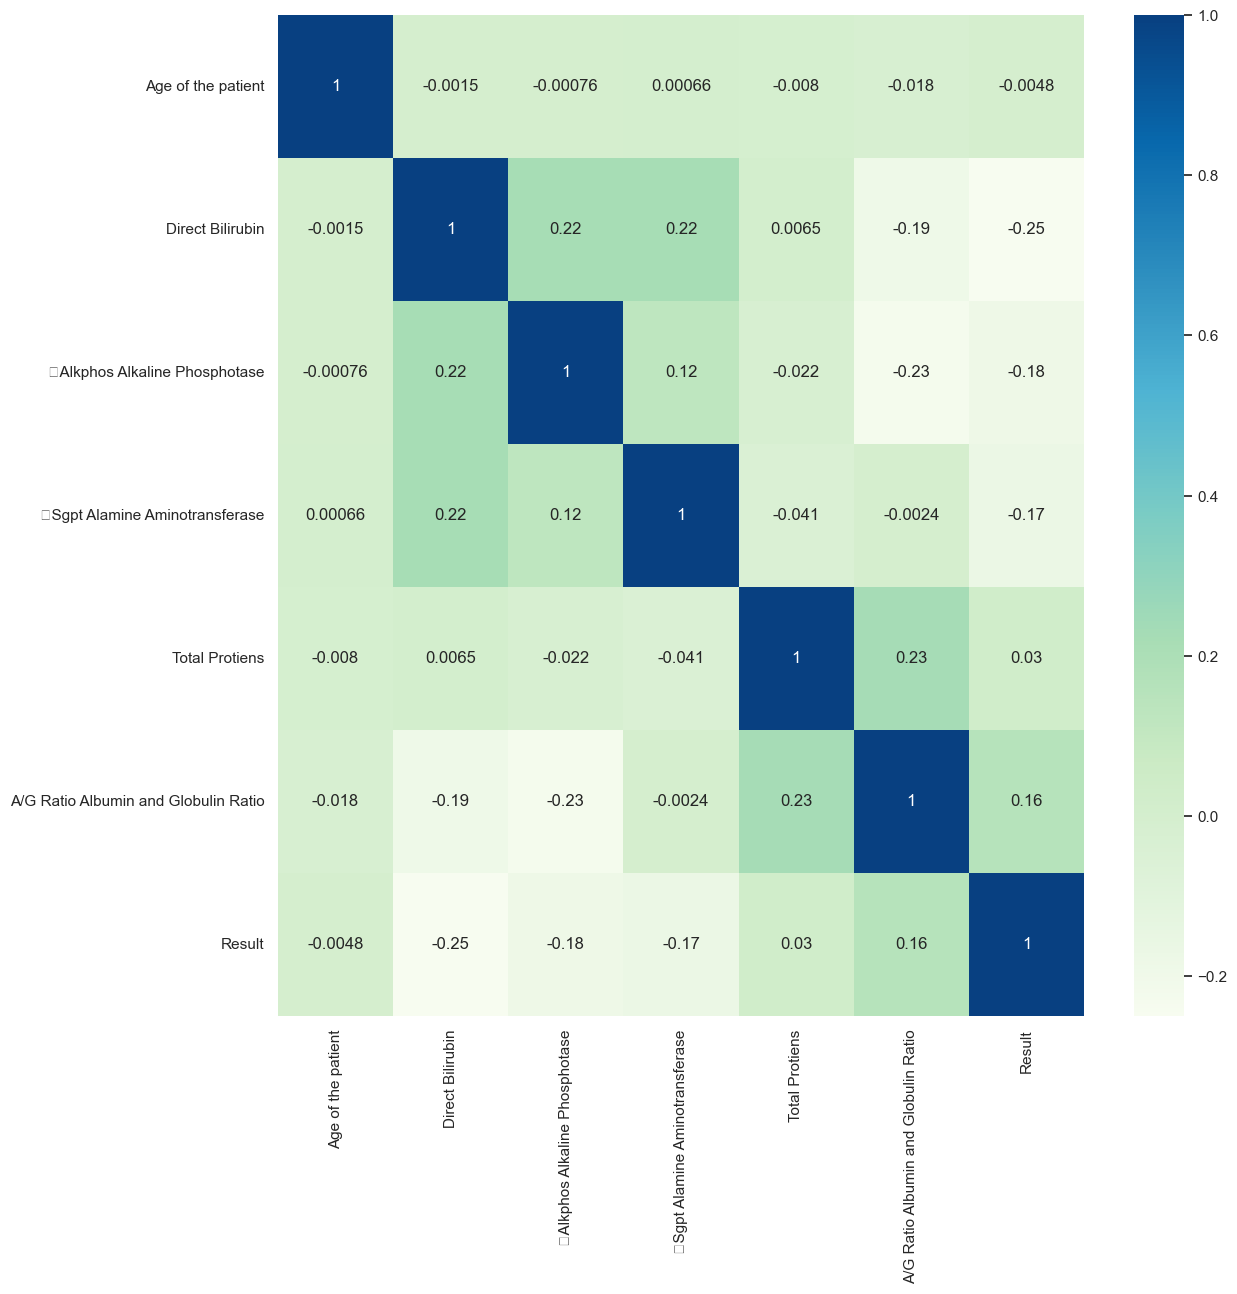

In [8]:
#correlation matrix after droping unessary columns 
corr_test=dataset
print(corr_test.corr())
print(corr_test.head(5))
sns.set(rc={"figure.figsize":(13, 13)})
sns.heatmap(corr_test.corr(), annot=True, cmap=plt.cm.GnBu)
plt.show()


In [9]:
# segregating the feature and dependent variable

#bulk dataset 
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [10]:
#taking care of missing numeric data.
imputer=SimpleImputer(missing_values=np.nan , strategy='most_frequent')
imputer.fit(x[: ,[0,2,3,4,5,6]])
x[: , [0,2,3,4,5,6]]=imputer.transform(x[: , [0,2,3,4,5,6]])
print(x)
print(x[1569])

[[65.0 'Female' 0.1 ... 16.0 6.8 0.9]
 [62.0 'Male' 5.5 ... 64.0 7.5 0.74]
 [62.0 'Male' 4.1 ... 60.0 7.0 0.89]
 ...
 [54.0 'Male' 3.0 ... 116.0 6.4 0.9]
 [48.0 'Female' 1.0 ... 16.0 4.3 0.6]
 [30.0 'Male' 1.6 ... 80.0 6.8 1.3]]
[43.0 'Female' 0.2 199.0 19.0 6.3 1.3]


In [11]:
#printing the dataset
print(x)
print(y)
print(x[0])

[[65.0 'Female' 0.1 ... 16.0 6.8 0.9]
 [62.0 'Male' 5.5 ... 64.0 7.5 0.74]
 [62.0 'Male' 4.1 ... 60.0 7.0 0.89]
 ...
 [54.0 'Male' 3.0 ... 116.0 6.4 0.9]
 [48.0 'Female' 1.0 ... 16.0 4.3 0.6]
 [30.0 'Male' 1.6 ... 80.0 6.8 1.3]]
[1 1 1 ... 1 1 1]
[65.0 'Female' 0.1 187.0 16.0 6.8 0.9]


In [12]:

#one hot encoding (encoding categorical data column name sex[1])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)    


[[1.0 0.0 0.0 ... 16.0 6.8 0.9]
 [0.0 1.0 0.0 ... 64.0 7.5 0.74]
 [0.0 1.0 0.0 ... 60.0 7.0 0.89]
 ...
 [0.0 1.0 0.0 ... 116.0 6.4 0.9]
 [1.0 0.0 0.0 ... 16.0 4.3 0.6]
 [0.0 1.0 0.0 ... 80.0 6.8 1.3]]


In [13]:
#bringing outcome event in between 0-1 
print(y.ndim)
y=np.where(y==1, 0, y)
y=np.where(y==2, 1, y)
print(y)


1
[0 0 0 ... 0 0 0]


In [14]:
#spliting dataset into training set and test set 
x_train, x_test, y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

[0.0 1.0 0.0 0.1627906976744186 0.22959183673469388 0.15779189057156814
 0.010050251256281407 0.40579710144927533 0.07200000000000001]


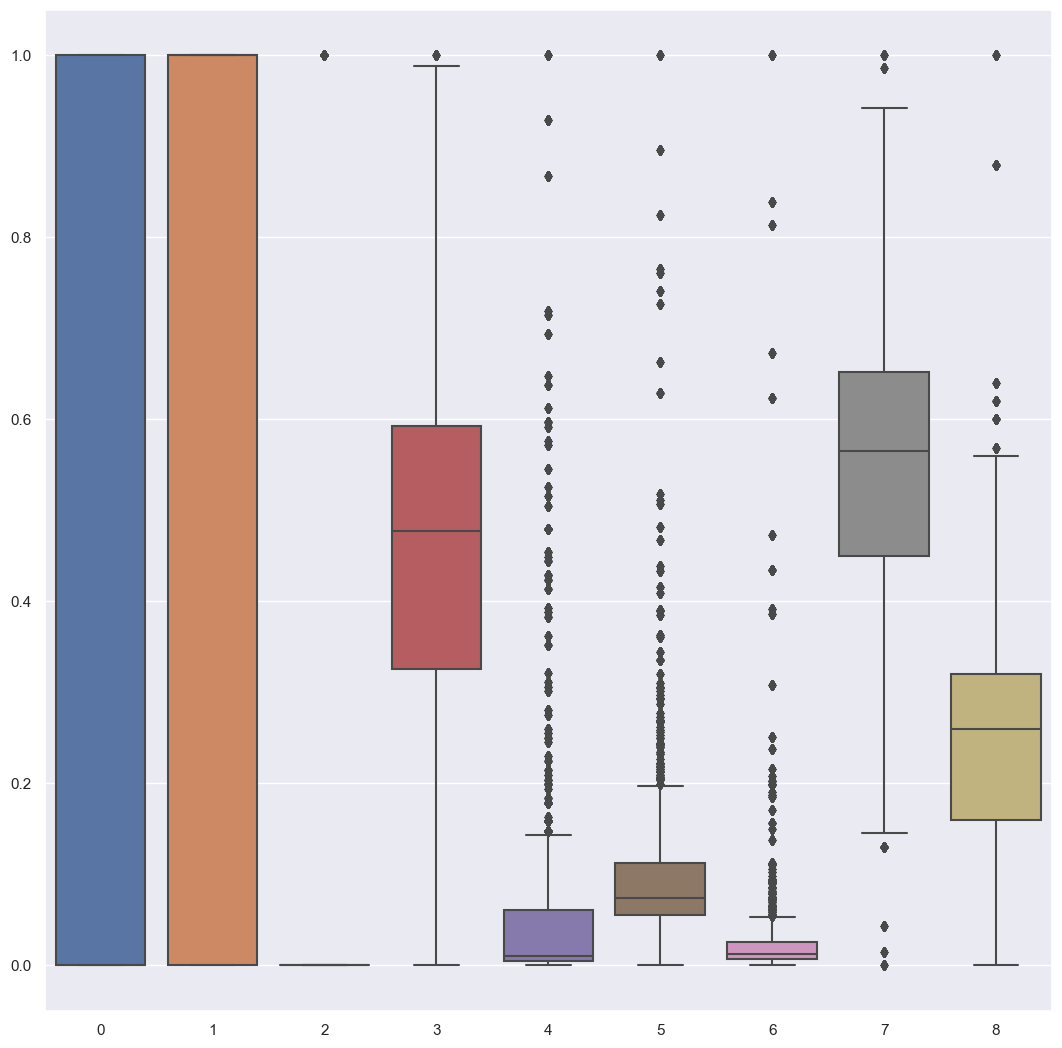

In [15]:
#feature scaling (based on standardisation making mean of column as 0 and standard daviation as 1. for,age[14],resting bp[15],cholestrol[16],max_hr[17],old peak[19] )
sc=MinMaxScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.fit_transform(x_test[:, 3:])
print(x_train[0])
x_tr_vis=pd.DataFrame(x_train)
x_ts_vis=pd.DataFrame(x_test)
sns.boxplot(data=x_tr_vis)
plt.show()


In [16]:
#implementing logistic regression
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)
y_pred = LRclassifier.predict(x_test)

#saving models 
from joblib import dump
dump(LRclassifier, 'LRclassifier_71')

['LRclassifier_71']

In [17]:
#accuracy calculation
print("\n")
print(LRclassifier.score(x_test,y_test)*100," :- is the accuracy for logistic regression test set particularly")



71.6403323016778  :- is the accuracy for logistic regression test set particularly


In [18]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      4381
           1       0.53      0.09      0.16      1758

    accuracy                           0.72      6139
   macro avg       0.63      0.53      0.50      6139
weighted avg       0.67      0.72      0.64      6139



In [19]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4231  150]
 [1591  167]]


In [20]:
#applying pca for visulization
pca=PCA(n_components=1)
reduced_dim_train=pca.fit_transform(x_test)
print(reduced_dim_train)



[[ 1.01599163]
 [-0.39968709]
 [-0.40006028]
 ...
 [-0.40047989]
 [ 1.01694609]
 [-0.39820733]]


In [21]:
#implementing k nearest neighbors
KNNClassifier = KNeighborsClassifier(n_neighbors=1)
KNNClassifier.fit(x_train, y_train)
y_pred = KNNClassifier.predict(x_test)
dump(KNNClassifier, 'KNNClassifier_93')

['KNNClassifier_93']

In [22]:
#accuracy
print("\n")
print(KNNClassifier.score(x_test,y_test)*100," :- is the accuracy for knearest neighbors test set particularly")    




92.86528750610849  :- is the accuracy for knearest neighbors test set particularly


In [23]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4381
           1       0.88      0.87      0.88      1758

    accuracy                           0.93      6139
   macro avg       0.91      0.91      0.91      6139
weighted avg       0.93      0.93      0.93      6139



In [24]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4163  218]
 [ 220 1538]]


In [25]:
#implementing dicision tree classification 
dtr =DecisionTreeClassifier()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
dump(dtr, 'dtr_99')

['dtr_99']

In [26]:
#accuracy
print("\n")
print(dtr.score(x_test,y_test)*100," :- is the accuracy for dicision tree classification  test set particularly  ")




99.13666720964326  :- is the accuracy for dicision tree classification  test set particularly  


In [27]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4381
           1       0.99      0.98      0.98      1758

    accuracy                           0.99      6139
   macro avg       0.99      0.99      0.99      6139
weighted avg       0.99      0.99      0.99      6139



In [28]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4356   25]
 [  28 1730]]


In [29]:
#implementing random forest classifier 
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

dump(rfc, 'rfc_99')

['rfc_99']

In [30]:
#accuracy
print("\n")
print(rfc.score(x_test,y_test)*100," :- is the accuracy for random forest classifier test set particularly  ")




99.44616387033719  :- is the accuracy for random forest classifier test set particularly  


In [31]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4381
           1       1.00      0.98      0.99      1758

    accuracy                           0.99      6139
   macro avg       1.00      0.99      0.99      6139
weighted avg       0.99      0.99      0.99      6139



In [32]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4375    6]
 [  28 1730]]


In [33]:
#implementing the support vector classifier 
svc=SVC(kernel='linear', random_state=0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
dump(svc, 'svc_72.joblib')

['svc_72.joblib']

In [34]:
#accuracy
print("\n")
print(svc.score(x_test,y_test)*100," :- is the accuracy for support vector classifier test set particularly  ")



71.3634142368464  :- is the accuracy for support vector classifier test set particularly  


In [35]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4381
           1       0.00      0.00      0.00      1758

    accuracy                           0.71      6139
   macro avg       0.36      0.50      0.42      6139
weighted avg       0.51      0.71      0.59      6139



c:\Users\rkd3d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rkd3d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rkd3d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [36]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[4381    0]
 [1758    0]]


In [37]:
#applying gaussiannb navi bayes classification
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
dump(gnb, 'gnb_56.joblib')

['gnb_56.joblib']

In [38]:
#accuracy
print("\n")
print(gnb.score(x_test,y_test)*100," :- is the accuracy for gaussiannb navi bayes classification test set particularly  ")




56.10034207525656  :- is the accuracy for gaussiannb navi bayes classification test set particularly  


In [39]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.40      0.57      4381
           1       0.39      0.95      0.55      1758

    accuracy                           0.56      6139
   macro avg       0.67      0.68      0.56      6139
weighted avg       0.79      0.56      0.56      6139



In [40]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[1766 2615]
 [  80 1678]]


In [41]:
#applying xgboost
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
dump(xgb, 'xgb_995')

['xgb_995']

In [42]:
#accuracy
print("\n")
print(xgb.score(x_test,y_test)*100," :- is the accuracy for xgboost classification test set particularly  ")




99.51132106206224  :- is the accuracy for xgboost classification test set particularly  


In [43]:
#claasification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4381
           1       0.99      0.99      0.99      1758

    accuracy                           1.00      6139
   macro avg       0.99      0.99      0.99      6139
weighted avg       1.00      1.00      1.00      6139



In [44]:
#confusion metrics 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4370   11]
 [  19 1739]]


In [45]:
#applying artificial neural network
x_train = np.asarray(x_train).astype('float32')

In [46]:
DF_xtr=pd.DataFrame(x_train)
DF_ytr=pd.DataFrame(y_train)
DF_xts=pd.DataFrame(x_test)
DF_yts=pd.DataFrame(y_test)
DF_xts

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.430233,0.005102,0.061553,0.021106,0.768116,0.48
1,0.0,1.0,0.0,0.523256,0.693878,0.242794,0.015578,0.753623,0.88
2,0.0,1.0,0.0,0.534884,0.596939,0.662921,0.39196,0.492754,0.04
3,1.0,0.0,0.0,0.697674,0.005102,0.062042,0.007538,0.536232,0.36
4,0.0,1.0,0.0,0.488372,0.0,0.141182,0.009045,0.753623,0.32
...,...,...,...,...,...,...,...,...,...
6134,0.0,1.0,0.0,0.430233,0.005102,0.041036,0.008543,0.333333,0.28
6135,0.0,1.0,0.0,0.372093,0.0,0.047386,0.01608,0.318841,0.32
6136,0.0,1.0,0.0,0.825581,0.0,0.054714,0.019095,0.478261,0.52
6137,1.0,0.0,0.0,0.302326,0.010204,0.048852,0.019095,0.637681,0.28


In [47]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
xgb.score(x_test,y_test)

0.9951132106206223

In [48]:
confusion_matrix(y_test,y_pred)

array([[4370,   11],
       [  19, 1739]], dtype=int64)

In [50]:
print(x_test[3])

[1.0 0.0 0.0 0.6976744186046512 0.005102040816326532 0.06204201270151441
 0.007537688442211055 0.5362318840579712 0.36]
